### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture

### Loading the dataset

In [2]:
lloyds_users_df = pd.read_csv('SavedData/Lloyds_users.csv')

In [3]:
lloyds_users_df

,user_id,total_tx_count,net_tx_count,total_tx_sum_gbp,net_tx_sum_gbp,sent_tx_count,sent_tx_sum_gbp,sent_tx_mean_gbp,sent_tx_median_gbp,received_tx_count,...,user_biz_interaction_frequency,user_biz_spend,user_user_interaction,user_user_interaction_frequency,user_user_spend,user_industry_interaction,user_industry_interaction_frequency,user_industry_spend,user_date_transaction,user_date_transaction_freq
0,1000,1903,1517,37720.11,19676.91,1710,28698.51,16.782754,4.50,193,...,"[116, 117, 2, 72, 5, 9, 19, 1, 35, 119, 1, 2, ...","[278.15, 269.25, 217.86, 850.5, 19.5, 347.15, ...","['16354', '18013', '30208', '31489', '36647', ...","[55, 14, 6, 12, 1, 14, 5, 14, 1, 18, 21, 1, 27...","[315.4, 86.5, 35.0, 16130.0, 5.0, 94.0, 24.0, ...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[3, 1, 1, 813, 2, 3, 37, 1, 7, 2, 30, 21, 353,...","[114.97999999999999, 145.0, 8.0, 1955.2, 160.0...","['01/01/2025', '01/02/2025', '01/03/2025', '01...","[5, 5, 13, 6, 2, 9, 5, 8, 6, 5, 5, 7, 4, 7, 2,..."
1,10000,1114,720,21360.39,18944.39,917,20152.39,21.976434,11.00,197,...,"[6, 1, 16, 71, 59, 3, 9, 7, 33, 2, 22, 7, 9, 2...","[13.65, 2.25, 349.77, 791.0, 1275.25, 12.5, 27...","['15896', '28620', '33124', '33732', '34123', ...","[39, 49, 1, 19, 10, 9, 59, 17, 29, 22, 19, 13]","[253.65, 5228.46, 50.0, 106.85, 55.2, 49.9, 32...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Coff...","[1, 23, 34, 23, 1, 51, 2, 1, 14, 312, 119, 3, ...","[19.99, 3002.0, 370.0, 56.25, 33.64, 1685.48, ...","['01/02/2025', '01/03/2025', '01/04/2025', '01...","[3, 4, 1, 8, 3, 3, 2, 3, 2, 6, 3, 7, 1, 9, 7, ..."
2,100000,1919,1433,23455.27,20720.37,1676,22087.82,13.178890,4.50,243,...,"[5, 106, 129, 16, 95, 5, 11, 1, 122, 20, 1, 5,...","[113.0, 256.2, 318.4, 1596.43, 1142.5, 23.0, 4...","['12753', '24398', '24951', '28719', '34678', ...","[19, 14, 24, 54, 17, 21, 6, 19, 9, 30, 27, 30,...","[135.5, 83.3, 146.5, 4857.0, 109.0, 124.0, 35....","['Accessories', 'Alcohol', 'Apparel', 'Cafes',...","[15, 7, 1, 828, 10, 58, 5, 2, 18, 1, 334, 65, ...","[369.0, 145.95999999999998, 37.0, 2015.95, 300...","['01/01/2025', '01/02/2025', '01/03/2025', '01...","[3, 3, 10, 2, 3, 12, 5, 6, 3, 3, 3, 3, 4, 6, 1..."
3,100002,1561,1233,22393.96,20303.16,1397,21348.56,15.281718,4.50,164,...,"[50, 59, 18, 155, 1, 48, 1, 4, 26, 9, 14, 58, ...","[113.35, 142.65, 1896.42, 965.5, 10.0, 212.5, ...","['10432', '14001', '3296', '37438', '37918', '...","[8, 1, 5, 1, 6, 10, 11, 7, 27, 2, 2, 1, 17, 4,...","[76.08, 2.45, 35.0, 1.45, 46.0, 61.5, 52.55, 4...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[8, 32, 2, 281, 2, 3, 33, 4, 2, 10, 269, 511, ...","[166.94, 3464.0, 15.0, 767.9, 99.0, 96.81, 117...","['01/01/2025', '01/02/2025', '01/03/2025', '01...","[3, 7, 6, 2, 5, 14, 2, 14, 3, 2, 5, 4, 2, 4, 4..."
4,100019,1157,719,44632.75,16232.85,938,30432.80,32.444350,9.00,219,...,"[50, 54, 15, 91, 1, 1, 2, 11, 1, 9, 7, 68, 9, ...","[118.95, 129.0, 1163.37, 1031.0, 60.0, 3.0, 12...","['22634', '38580', '40565', '44911', '61350', ...","[21, 33, 18, 4, 24, 11, 28, 25, 27, 58]","[125.5, 221.0, 113.0, 24.5, 163.0, 15060.0, 16...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[1, 25, 1, 214, 4, 1, 38, 1, 12, 13, 314, 1, 6...","[12.0, 2701.0, 15.0, 514.55, 250.0, 26.36, 136...","['01/02/2025', '01/03/2025', '01/06/2025', '01...","[6, 8, 3, 1, 4, 2, 2, 9, 1, 5, 3, 3, 2, 5, 3, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,99939,1488,1078,20117.08,17723.34,1283,18920.21,14.746851,9.00,205,...,"[56, 56, 13, 80, 57, 8, 3, 8, 2, 2, 44, 51, 23...","[136.75, 128.05, 265.17, 955.0, 1279.85, 37.0,...","['15880', '24365', '24475', '2858', '33124', '...","[6, 34, 17, 50, 1, 25, 31, 21, 22, 27, 13, 51,...","[31.0, 189.25, 108.0, 3905.35, 50.0, 140.65, 1...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[3, 2, 38, 227, 25, 7, 46, 3, 2, 2, 37, 25, 34...","[114.97999999999999, 263.0, 378.0, 553.85, 135...","['01/01/2025', '01/02/2025', '01/03/2025', '01...","[2, 13, 4, 2

## RFM Analysis

### Creating the columns

To calculate the recency value, I will calculate the days between the first date recorded (01/01/2025) and the user's most recent date of transaction. The Frequency value is from the 'total_tx_count' column, and the Monetary value is from the 'total_tx_sum_gbp' column.

In [4]:
lloyds_users_df['user_date_transaction'] = lloyds_users_df['user_date_transaction'].apply(ast.literal_eval)

# Parse the 'user_date_transaction' column to find the most recent transaction date
lloyds_users_df['most_recent_tx'] = lloyds_users_df['user_date_transaction'].apply(
    lambda dates: max([datetime.strptime(date, '%d/%m/%Y') for date in dates])
)

# Define the reference date (the starting point to calculate recency)
reference_date = datetime.strptime('01/01/2025', '%d/%m/%Y')

# Calculate Recency
lloyds_users_df['Recency'] = (lloyds_users_df['most_recent_tx'] - reference_date).dt.days

# Prepare the new DataFrame for RFM analysis
# Assuming 'total_tx_count' is the Frequency and 'total_tx_sum_gbp' is the Monetary value
rfm_df = lloyds_users_df[['user_id', 'Recency', 'sent_tx_count', 'sent_tx_sum_gbp']].copy()
rfm_df.columns = ['user_id', 'Recency', 'Frequency', 'Monetary']


In [5]:
rfm_df.head(20)

,user_id,Recency,Frequency,Monetary
0,1000,364,1710,28698.51
1,10000,361,917,20152.39
2,100000,364,1676,22087.82
3,100002,364,1397,21348.56
4,100019,364,938,30432.80
5,10004,364,1749,18261.47
6,100053,364,1393,30137.71
7,100060,364,1167,18504.60
8,100086,363,1288,21720.55
9,100094,363,610,22875.31


In [6]:
rfm_df.describe()

,user_id,Recency,Frequency,Monetary
count,8142.000000,8142.000000,8142.000000,8142.000000
mean,50826.578605,363.726603,1246.411201,22925.845676
std,28946.392695,0.641999,346.909076,6811.697500
min,1000.000000,360.000000,436.000000,8079.130000
25%,25450.250000,364.000000,989.000000,17699.610000
50%,50860.500000,364.000000,1154.000000,21021.590000
75%,75606.750000,364.000000,1500.000000,28918.547500
max,100988.000000,364.000000,2728.000000,45141.370000


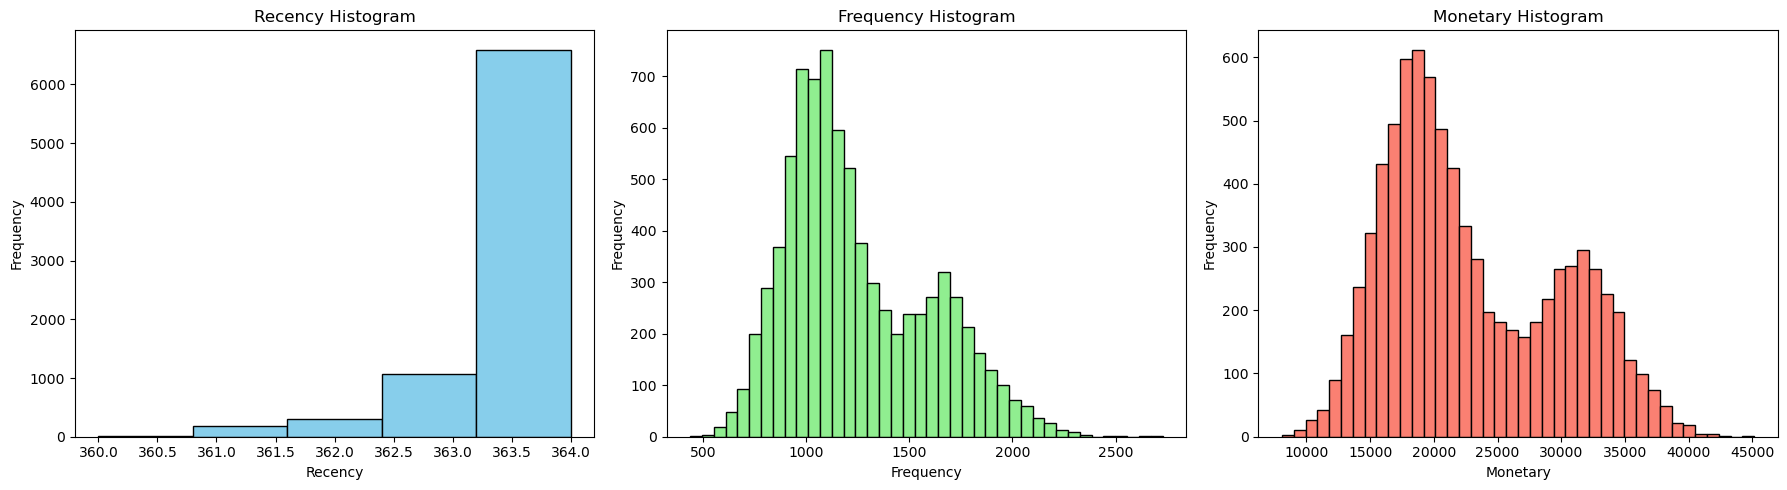

In [7]:
# Create histograms
fig, ax = plt.subplots(1, 3, figsize=(18, 5))  # Setup a figure with 3 subplots

# Recency Histogram
rfm_df['Recency'].plot(kind='hist', ax=ax[0], bins=5, color='skyblue', edgecolor='black')
ax[0].set_title('Recency Histogram')
ax[0].set_xlabel('Recency')
ax[0].set_ylabel('Frequency')

# Frequency Histogram
rfm_df['Frequency'].plot(kind='hist', ax=ax[1], bins=40, color='lightgreen', edgecolor='black')
ax[1].set_title('Frequency Histogram')
ax[1].set_xlabel('Frequency')

# Monetary Histogram
rfm_df['Monetary'].plot(kind='hist', ax=ax[2], bins=40, color='salmon', edgecolor='black')
ax[2].set_title('Monetary Histogram')
ax[2].set_xlabel('Monetary')

plt.tight_layout()  
plt.show()


Mulitmodal distribution for the frequency and monetary distributions

There are many ways to calculate the RFM scores. After exploring my data and researching papers on RFM analysis, I decided to use a scale of 1-4 rather than 1-5 (the common way) given there is only 8142 unique customers in the dataset. Moreover, I will be assigning the scores for Frequency and Monetary values through using quartiles, since there is enough variation in the data to be split into 4 groups. However, all unique accounts seemed to have completed transactions in the last 5 days of the year. Therefore, I will assign a highest score of 4 to all of those who spent money on the last day of the year, and give the accounts who spent in the last 5 days of the year a 3. 

In [8]:
rfm_df['R_Score'] = rfm_df['Recency'].apply(lambda x: 4 if x == 364 else (3 if 360 <= x <= 363 else 1))
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 4, labels=[1, 2, 3, 4]).astype(int)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4]).astype(int)

# Calculate RFM_Score with the adjusted R_Score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Display the updated DataFrame to show the adjusted RFM Scores based on the corrected criteria
rfm_df[['user_id', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']].head(30)


,user_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1000,364,1710,28698.51,4,4,3,443
1,10000,361,917,20152.39,3,1,2,312
2,100000,364,1676,22087.82,4,4,3,443
3,100002,364,1397,21348.56,4,3,3,433
4,100019,364,938,30432.80,4,1,4,414
5,10004,364,1749,18261.47,4,4,2,442
6,100053,364,1393,30137.71,4,3,4,434
7,100060,364,1167,18504.60,4,3,2,432
8,100086,363,1288,21720.55,3,3,3,333
9,100094,363,610,22875.31,3,1,3,313


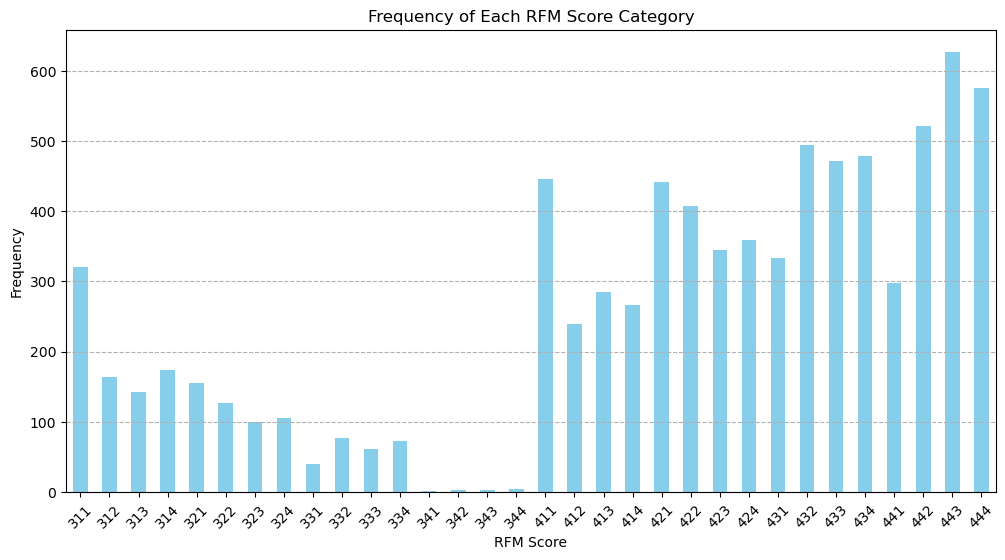

In [9]:
# Count the frequency of each RFM score category
rfm_score_counts = rfm_df['RFM_Score'].value_counts()

# Sort the RFM scores to ensure the histogram follows a logical order
rfm_score_counts = rfm_score_counts.sort_index()

# Plotting
plt.figure(figsize=(12, 6))
rfm_score_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each RFM Score Category')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()


In [10]:
# Function to calculate the sum of digits in the RFM score
def sum_of_digits(score):
    return sum(int(digit) for digit in score)

# Adding a new column to the DataFrame for the sum of RFM score digits
rfm_df['Sum_of_Score'] = rfm_df['RFM_Score'].apply(sum_of_digits)

# Defining the sum ranges for each category
champion_value_sums = [11, 12]
high_value_sum_range = range(9, 11) 
middle_value_sum_range = range(7, 9)  
low_value_sum_range = range(5, 7)  

# Categorising based on sum
rfm_df['Customer_Segment_RFM'] = 'Low Value'  

# Applying categorisations
rfm_df.loc[rfm_df['Sum_of_Score'].isin(champion_value_sums), 'Customer_Segment_RFM'] = 'Champion Value'
rfm_df.loc[rfm_df['Sum_of_Score'].isin(high_value_sum_range), 'Customer_Segment_RFM'] = 'High Value'
rfm_df.loc[rfm_df['Sum_of_Score'].isin(middle_value_sum_range), 'Customer_Segment_RFM'] = 'Middle Value'
rfm_df['Customer_Segment_RFM'].value_counts()

High Value        3000
Middle Value      2371
Champion Value    1686
Low Value         1085
Name: Customer_Segment_RFM, dtype: int64

In [11]:
rfm_df

,user_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Sum_of_Score,Customer_Segment_RFM
0,1000,364,1710,28698.51,4,4,3,443,11,Champion Value
1,10000,361,917,20152.39,3,1,2,312,6,Low Value
2,100000,364,1676,22087.82,4,4,3,443,11,Champion Value
3,100002,364,1397,21348.56,4,3,3,433,10,High Value
4,100019,364,938,30432.80,4,1,4,414,9,High Value
...,...,...,...,...,...,...,...,...,...,...
8137,99939,363,1283,18920.21,3,3,2,332,8,Middle Value
8138,99949,364,1003,13961.86,4,2,1,421,7,Middle Value
8139,99952,364,1287,34315.19,4,3,4,434,11,Champion Value
8140,99988,364,1259,30394.88,4,3,4,434,11,Champion Value


Reward customers based on their customer segment:
- Champions customers: reward them eg. early adopters of new products, will promote LLoyds and could send referrals
- High value customers: upsell higher value products eg. Club Lloyds platinum - could look into travel payments in next dataset 
- Medium value customers: Offer personalised recommendations, keep them engaged, provide helpful tips
- Low value: standard emails, do not spend two much money

### Clustering Customer Segments through k-means

/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

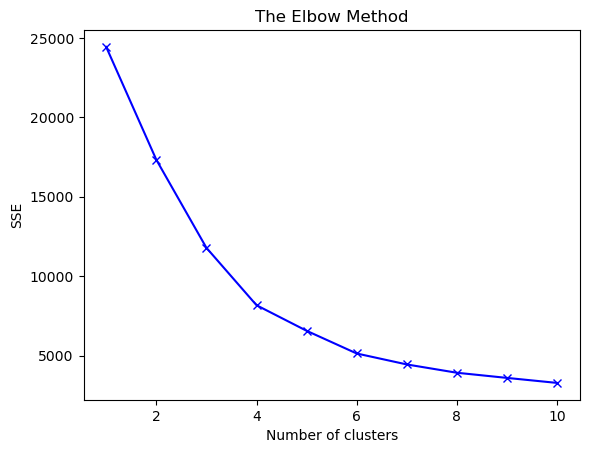

In [12]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_  
    

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('The Elbow Method')
plt.show()


### Using 3 clusters

In [13]:
#Run the K-means algorithm
# Choose the optimal number of clusters 
kmeans = KMeans(n_clusters=3, random_state=1)
rfm_df['Customer_Segment_Kmeans_3'] = kmeans.fit_predict(rfm_scaled)

# Accessing the centroids
centroids = kmeans.cluster_centers_

# Displaying the centroids
print("Centroids of each cluster:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")
    
rfm_df.head(20)

Centroids of each cluster:
Cluster 0: [-1.90726994 -0.81438568 -0.36812607]
Cluster 1: [0.30836274 0.17569937 1.26420971]
Cluster 2: [ 0.42193727  0.15545807 -0.59448552]


/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,user_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Sum_of_Score,Customer_Segment_RFM,Customer_Segment_Kmeans_3
0,1000,364,1710,28698.51,4,4,3,443,11,Champion Value,1
1,10000,361,917,20152.39,3,1,2,312,6,Low Value,0
2,100000,364,1676,22087.82,4,4,3,443,11,Champion Value,2
3,100002,364,1397,21348.56,4,3,3,433,10,High Value,2
4,100019,364,938,30432.80,4,1,4,414,9,High Value,1
5,10004,364,1749,18261.47,4,4,2,442,10,High Value,2
6,100053,364,1393,30137.71,4,3,4,434,11,Champion Value,1
7,100060,364,1167,18504.60,4,3,2,432,9,High Value,2
8,100086,363,1288,21720.55,3,3,3,333,9,High Value,0
9,100094,363,610,22875.31,3,1,3,313,7,Middle Value,0


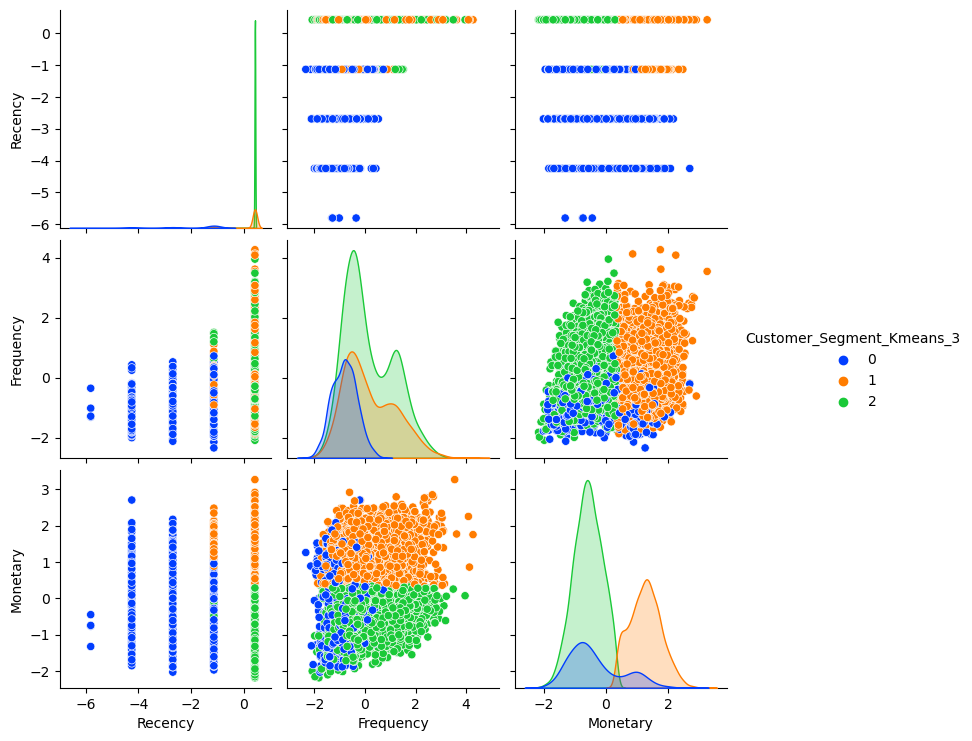

In [14]:
# Add the cluster assignments and the scaled RFM values back into the dataframe for plotting
rfm_df_plot = pd.DataFrame(rfm_scaled, columns=['Recency','Frequency', 'Monetary'])
rfm_df_plot['Customer_Segment_Kmeans_3'] = kmeans.labels_ 

# Use seaborn's pairplot to create pairwise scatter plots
sns.pairplot(rfm_df_plot, hue='Customer_Segment_Kmeans_3', vars=['Recency','Frequency', 'Monetary'], palette='bright')
plt.show()


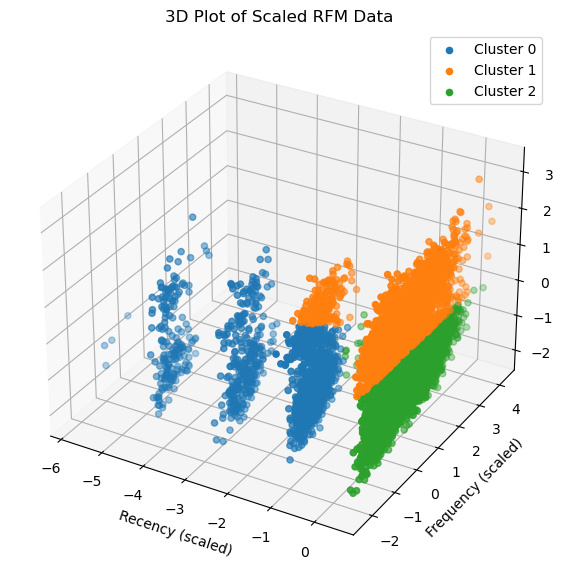

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a different color and label
for i in np.unique(kmeans.labels_):
    ax.scatter(rfm_scaled[kmeans.labels_ == i, 0], rfm_scaled[kmeans.labels_ == i, 1], rfm_scaled[kmeans.labels_ == i, 2], 
               label=f'Cluster {i}')

ax.set_xlabel('Recency (scaled)')
ax.set_ylabel('Frequency (scaled)')
ax.set_zlabel('Monetary (scaled)')
ax.set_title('3D Plot of Scaled RFM Data')
ax.legend()  
plt.show()


When using 3 clusters through k-means:
- cluster 0: lower frequency, mixture of monetary spending, spent within the last 5 days of the year
- cluster 1: range of frequency, higher recency, and high monetary spending
- cluster 2: range of frequency, lower monetary, high recency 


### Using 4 clusters

In [16]:
#Run the K-means algorithm
# Choose the optimal number of clusters 
kmeans = KMeans(n_clusters=4, random_state=1)
rfm_df['Customer_Segment_Kmeans_4'] = kmeans.fit_predict(rfm_scaled)

# Accessing the centroids
centroids = kmeans.cluster_centers_

# Displaying the centroids
print("Centroids of each cluster:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")
    
rfm_df.head(20)


Centroids of each cluster:
Cluster 0: [ 0.42587908 -0.45147811 -0.67749469]
Cluster 1: [ 0.23581737 -0.20105027  1.2955856 ]
Cluster 2: [ 0.4186413   1.42166956 -0.03394406]
Cluster 3: [-1.94254343 -0.80245064 -0.44028655]


/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,user_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Sum_of_Score,Customer_Segment_RFM,Customer_Segment_Kmeans_3,Customer_Segment_Kmeans_4
0,1000,364,1710,28698.51,4,4,3,443,11,Champion Value,1,2
1,10000,361,917,20152.39,3,1,2,312,6,Low Value,0,3
2,100000,364,1676,22087.82,4,4,3,443,11,Champion Value,2,2
3,100002,364,1397,21348.56,4,3,3,433,10,High Value,2,0
4,100019,364,938,30432.80,4,1,4,414,9,High Value,1,1
5,10004,364,1749,18261.47,4,4,2,442,10,High Value,2,2
6,100053,364,1393,30137.71,4,3,4,434,11,Champion Value,1,1
7,100060,364,1167,18504.60,4,3,2,432,9,High Value,2,0
8,100086,363,1288,21720.55,3,3,3,333,9,High Value,0,3
9,100094,363,610,22875.31,3,1,3,313,7,Middle Value,0,3


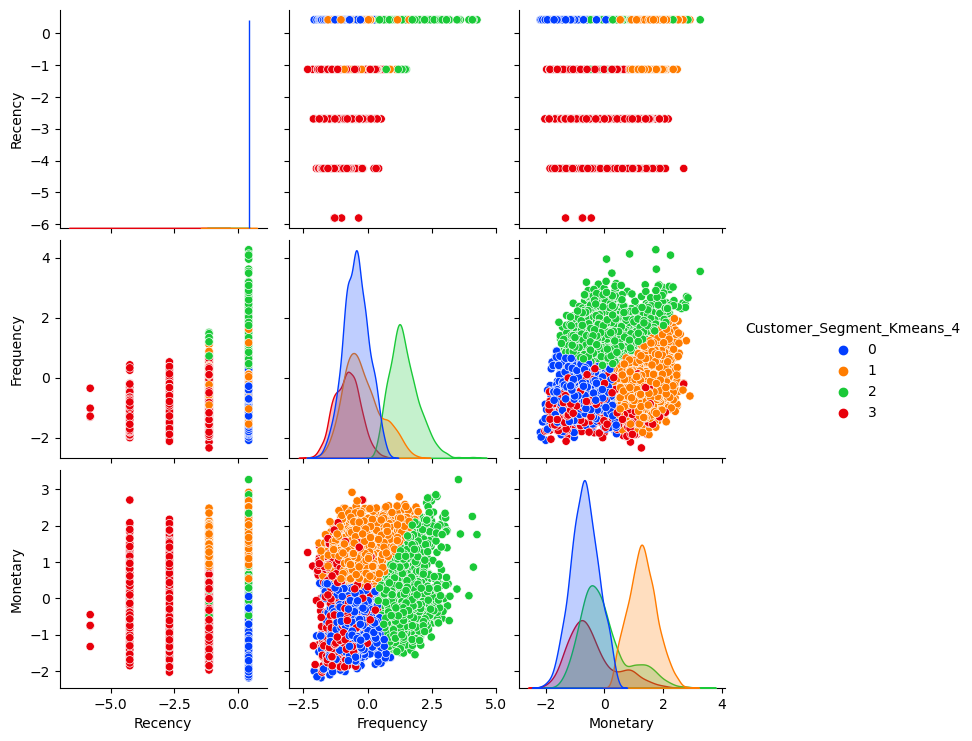

In [17]:
# Add the cluster assignments and the scaled RFM values back into the dataframe for plotting
rfm_df_plot = pd.DataFrame(rfm_scaled, columns=['Recency','Frequency', 'Monetary'])
rfm_df_plot['Customer_Segment_Kmeans_4'] = kmeans.labels_ 

# Use seaborn's pairplot to create pairwise scatter plots
sns.pairplot(rfm_df_plot, hue='Customer_Segment_Kmeans_4', vars=['Recency','Frequency', 'Monetary'], palette='bright')
plt.show()

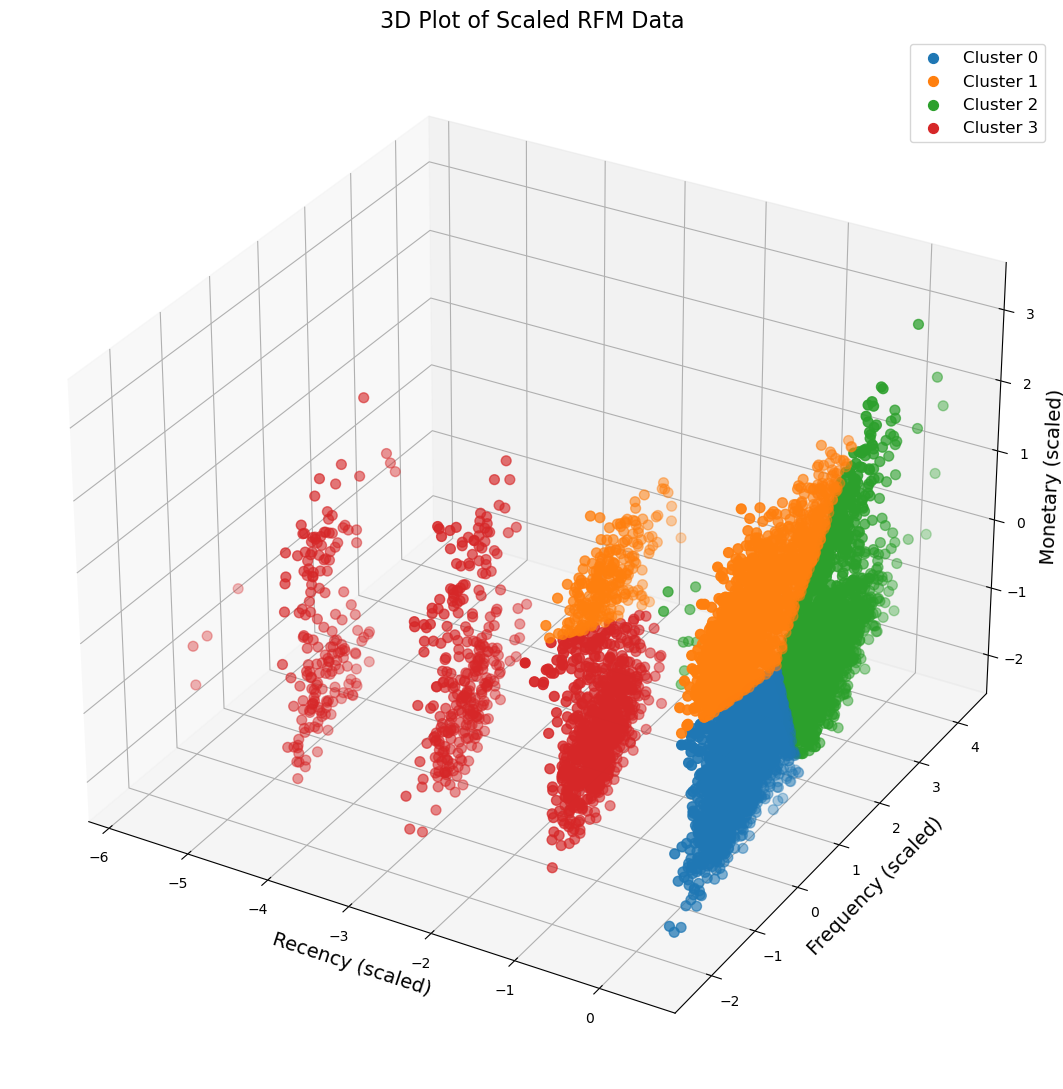

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Assume rfm_scaled data and kmeans model are already defined

fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a different color and label
for i in np.unique(kmeans.labels_):
    ax.scatter(rfm_scaled[kmeans.labels_ == i, 0], rfm_scaled[kmeans.labels_ == i, 1], rfm_scaled[kmeans.labels_ == i, 2], 
               label=f'Cluster {i}', s=50)  # s is the size of the points

# Set the labels and title with a larger font size
ax.set_xlabel('Recency (scaled)', fontsize=14)
ax.set_ylabel('Frequency (scaled)', fontsize=14)
ax.set_zlabel('Monetary (scaled)', fontsize=14)
ax.set_title('3D Plot of Scaled RFM Data', fontsize=16)

# Increase the legend font size
ax.legend(fontsize=12)

# Improve the layout and display the plot
plt.tight_layout()
plt.show()


K - means into 4 clusters:
- cluster 0: spent recently, lower frequency and lower monetarty
- cluster 1: spent recently, moderate frequency and higher monetary
- cluster 2: high recency, high frequency and a range of monetary 
- cluster 3: lower recency, low frequency, low monetary 

### Clustering through Gaussian Mixture Model- 3 clusters

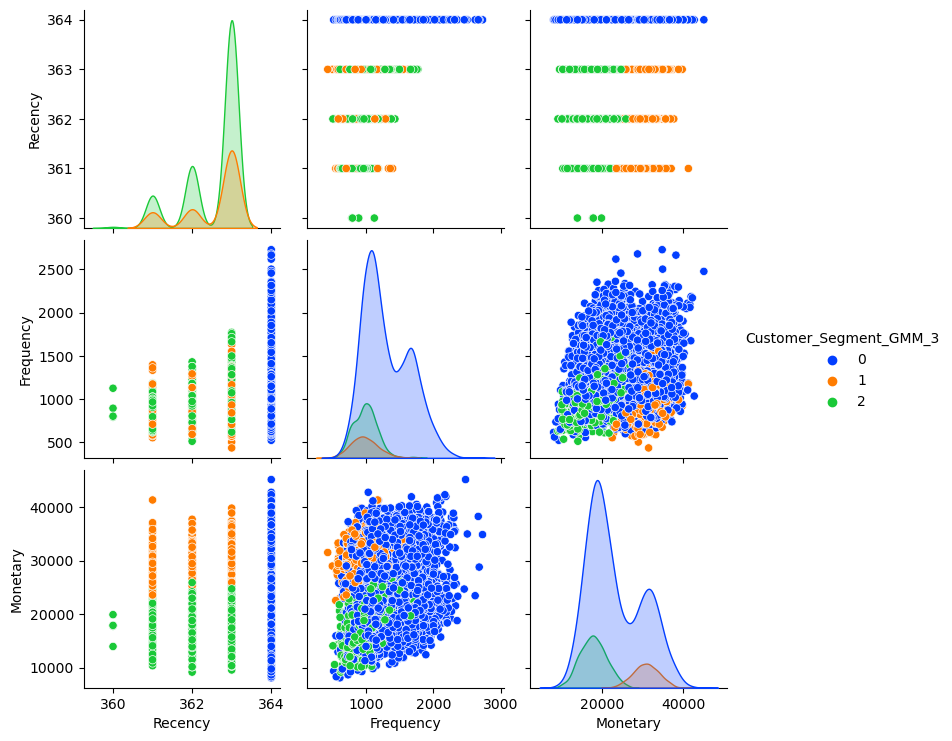

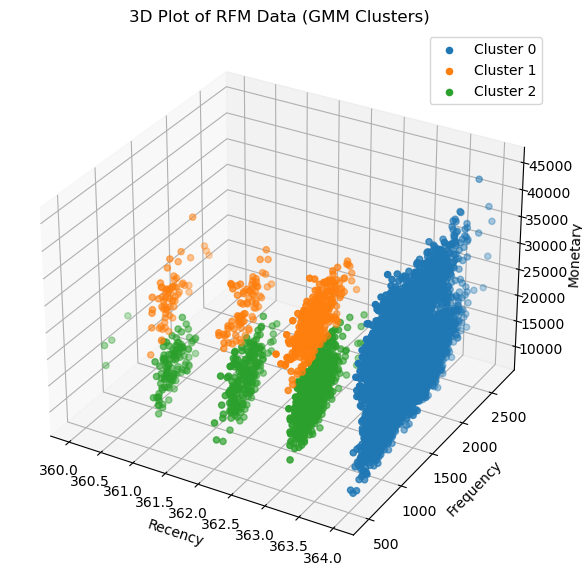

In [19]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=1) 
rfm_df['Customer_Segment_GMM_3'] = gmm.fit_predict(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Step 2: Draw a pairplot
sns.pairplot(rfm_df, hue='Customer_Segment_GMM_3', vars=['Recency', 'Frequency', 'Monetary'], palette='bright')
plt.show()

# Step 3: Create a 3D diagram
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(rfm_df['Customer_Segment_GMM_3']):
    ax.scatter(rfm_df.loc[rfm_df['Customer_Segment_GMM_3'] == i, 'Recency'],
               rfm_df.loc[rfm_df['Customer_Segment_GMM_3'] == i, 'Frequency'],
               rfm_df.loc[rfm_df['Customer_Segment_GMM_3'] == i, 'Monetary'],
               label=f'Cluster {i}')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Plot of RFM Data (GMM Clusters)')
ax.legend()
plt.show()



Not as good of a cluster:
- cluster 0: most recent, range of frequency and monetary
- cluster 1: not as recent, moderate-high monetary, moderate frequency
- cluster 2: not as recent, lower monetary, moderate frequency 

### GMM with 4 clusters

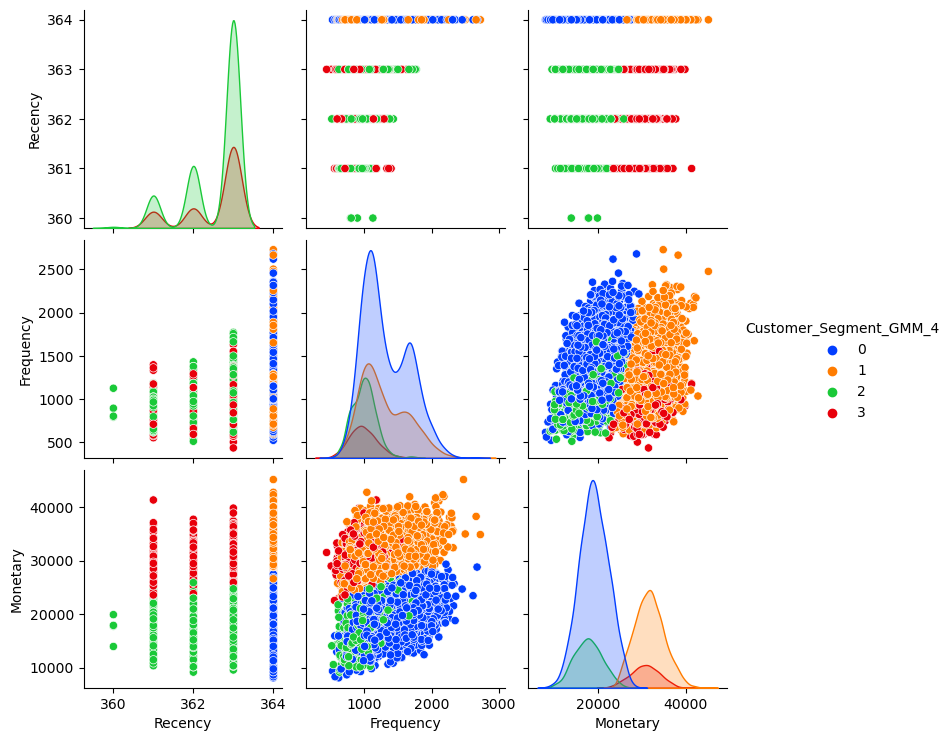

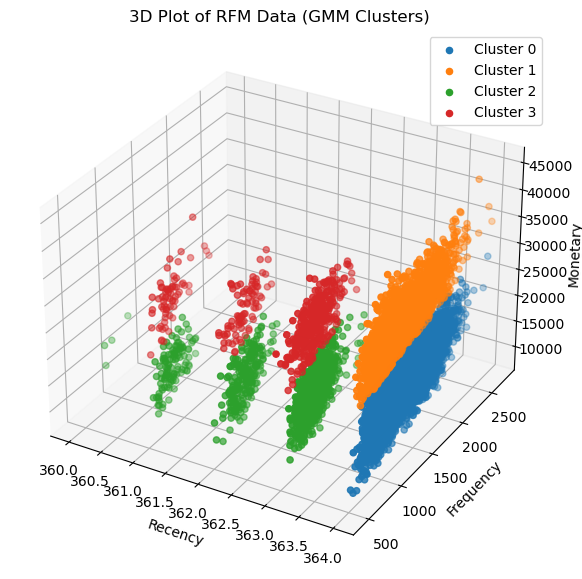

In [20]:
# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=1) 
rfm_df['Customer_Segment_GMM_4'] = gmm.fit_predict(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Step 2: Draw a pairplot
sns.pairplot(rfm_df, hue='Customer_Segment_GMM_4', vars=['Recency', 'Frequency', 'Monetary'], palette='bright')
plt.show()

# Step 3: Create a 3D diagram
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(rfm_df['Customer_Segment_GMM_4']):
    ax.scatter(rfm_df.loc[rfm_df['Customer_Segment_GMM_4'] == i, 'Recency'],
               rfm_df.loc[rfm_df['Customer_Segment_GMM_4'] == i, 'Frequency'],
               rfm_df.loc[rfm_df['Customer_Segment_GMM_4'] == i, 'Monetary'],
               label=f'Cluster {i}')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Plot of RFM Data (GMM Clusters)')
ax.legend()
plt.show()



- cluster 0: high recency, range of frequency, lower monetary
- cluster 1: high recency, range of frequency, high monetary 
- cluster 2: lower recency, low-moderate frequency, low monetary
- cluster 3: lower recency, low-moderate  frequency, high monetary